In [1]:
import pyforest

In [2]:
import pandas as pd

creditdata = pd.read_csv('credit_card.csv')
creditdata.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
creditdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID           30000 non-null int64
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_1        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
DEFAULT      30000 non-null int64
dtypes: int64(25)
memory usage: 5.7 MB


In [4]:
creditdata.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


### Exploratory Data Analysis

    Univariate Analysis

The columns in the dataset are either Numerical or categorical.

For Numerical Columns - Create a Histogram | Distplot

Histogram is a Statistical Plot that tells me how is the Data Being Distrib uted. If it is not normal (Bell Shaped), then it would be skewed.

For Categorical Column, we create a BARPLOT/Frequency/Count Plot


In [5]:
creditdata.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')

In [6]:
sns.distplot(creditdata.LIMIT_BAL)
plt.show()

<Figure size 640x480 with 1 Axes>

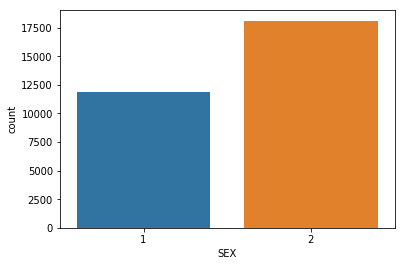

In [7]:
sns.countplot(creditdata.SEX)
plt.show()

SEX : (1 = MALE , 2 = FEMALE)

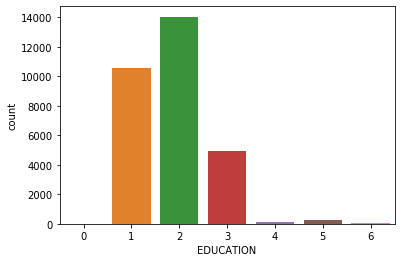

In [8]:
sns.countplot(creditdata.EDUCATION)
plt.show() 

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

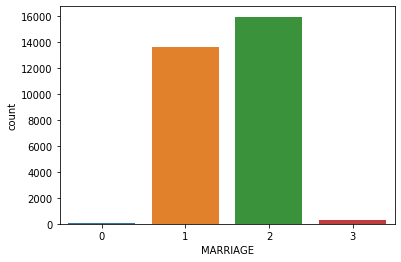

In [9]:
sns.countplot(creditdata.MARRIAGE)
plt.show()

MARRIAGE: Marital status (1=married, 2=single, 3=others)

In [10]:
creditdata.MARRIAGE.value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

PAY_1


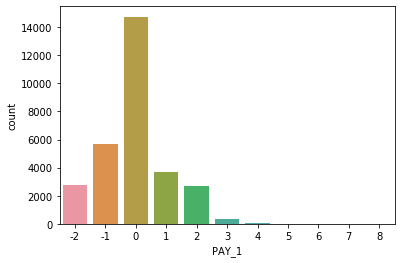

PAY_2


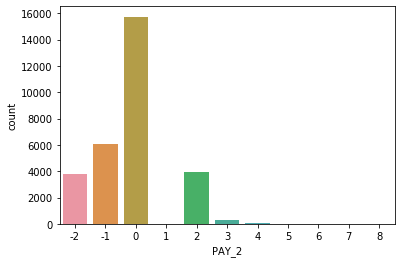

PAY_3


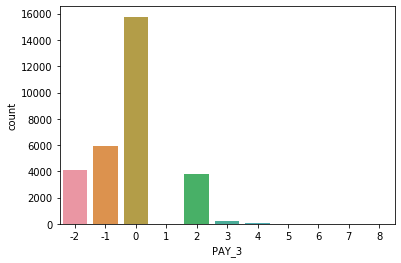

PAY_4


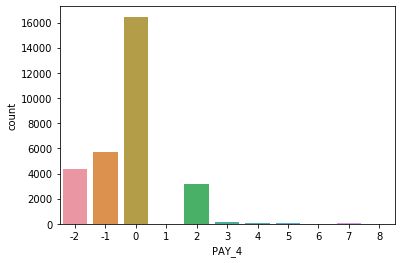

PAY_5


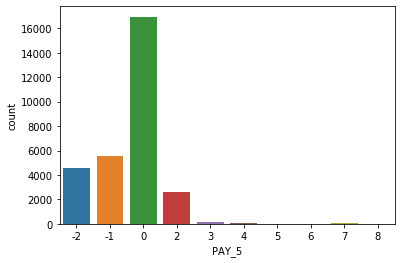

PAY_6


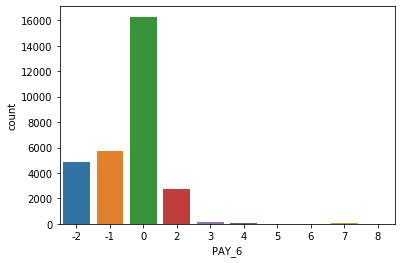

In [11]:
for i in creditdata[['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]:
    print(i)
    sns.countplot(creditdata[i])
    plt.show()

(-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)

BILL_AMT1


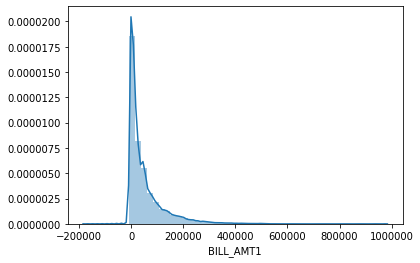

BILL_AMT2


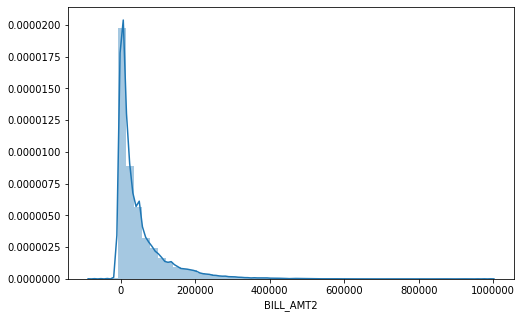

BILL_AMT3


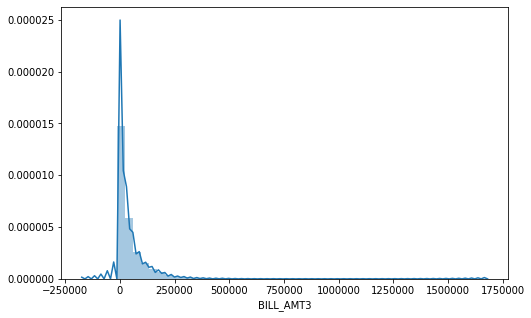

BILL_AMT4


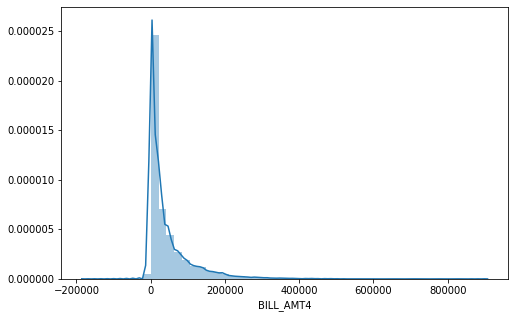

BILL_AMT5


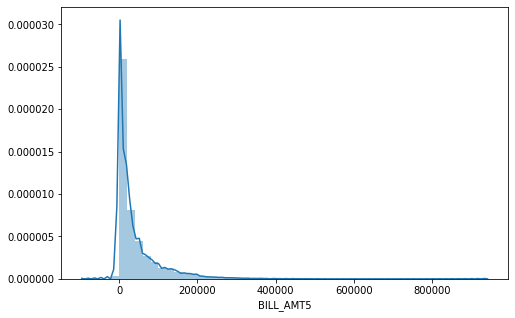

BILL_AMT6


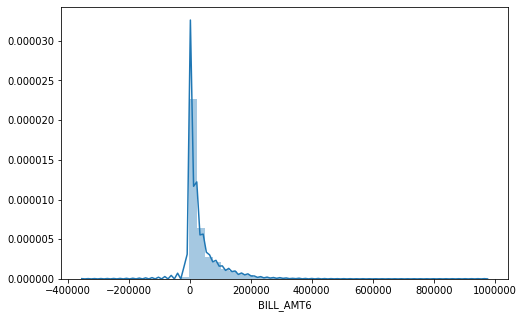

<Figure size 576x360 with 0 Axes>

In [12]:
for i in creditdata[['BILL_AMT1','BILL_AMT2' ,'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]:
    print(i)
    sns.distplot(creditdata[i])
    plt.show()
    plt.figure(figsize=(8,5))

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar) 

BILL_AMT2: Amount of bill statement in August, 2005 

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)   

BILL_AMT4: Amount of bill statement in June, 2005 

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)        

BILL_AMT6: Amount of bill statement in April, 2005 

PAY_AMT1


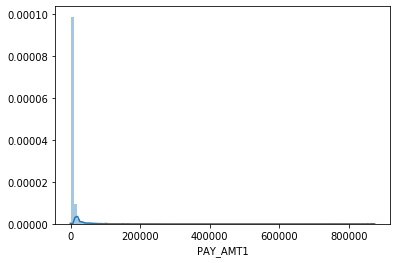

PAY_AMT2


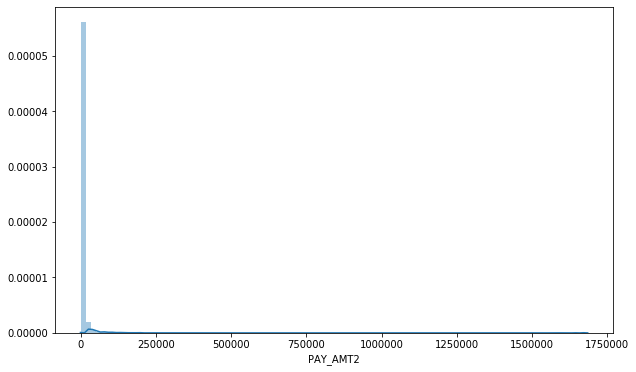

PAY_AMT3


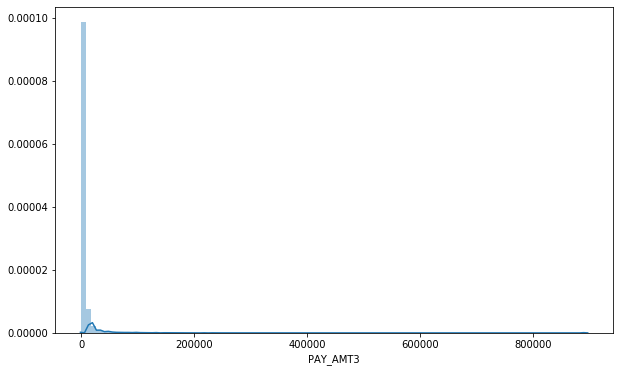

PAY_AMT4


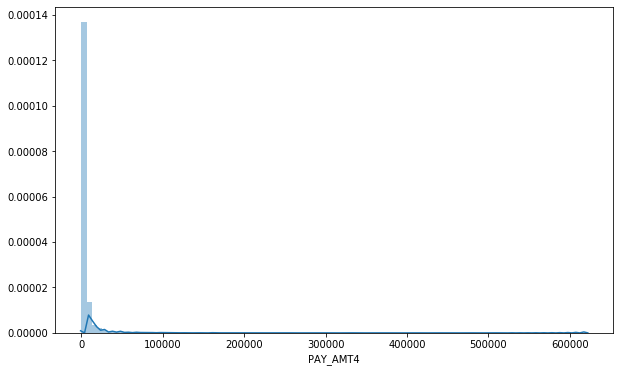

PAY_AMT5


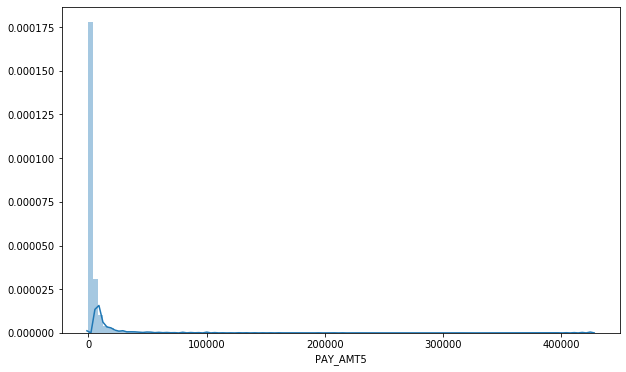

PAY_AMT6


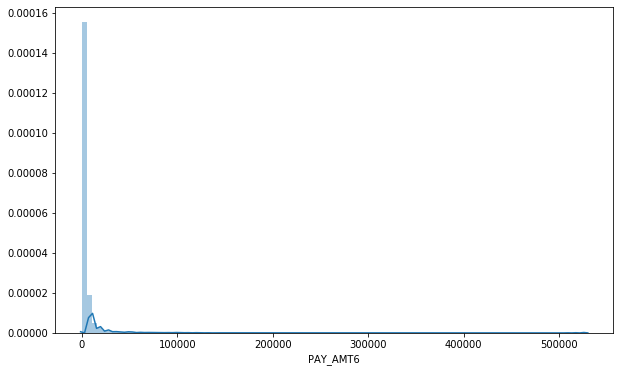

<Figure size 720x432 with 0 Axes>

In [13]:
for i in creditdata[['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]:
    print(i)
    sns.distplot(creditdata[i],bins=100)
    plt.show()
    plt.figure(figsize=(10,6))

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

In [14]:
creditdata=creditdata.drop('ID',axis=1)

LIMIT_BAL


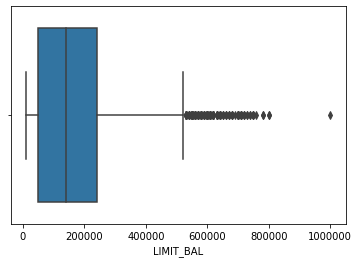

SEX


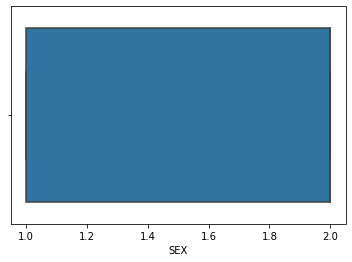

EDUCATION


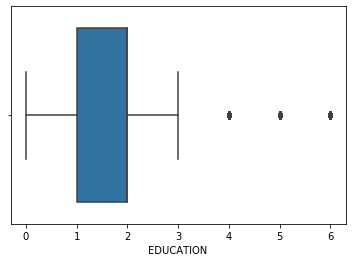

MARRIAGE


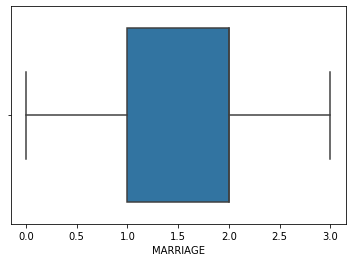

AGE


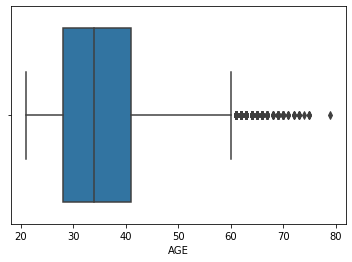

PAY_1


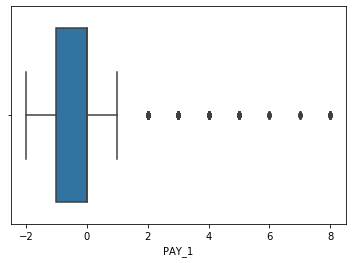

PAY_2


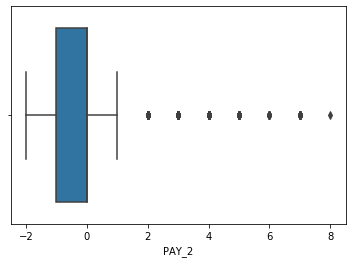

PAY_3


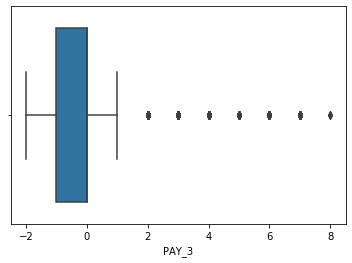

PAY_4


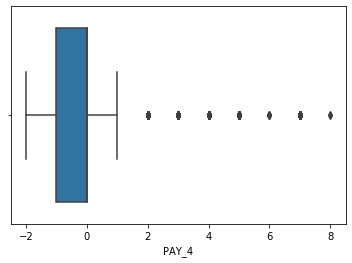

PAY_5


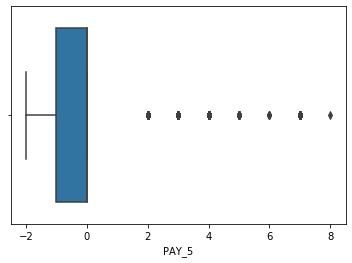

PAY_6


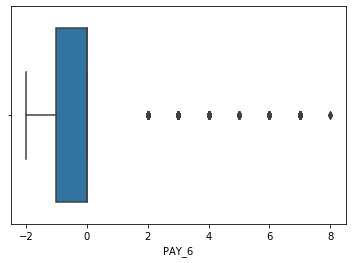

BILL_AMT1


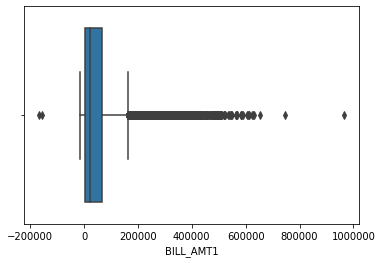

BILL_AMT2


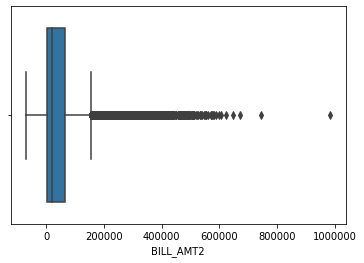

BILL_AMT3


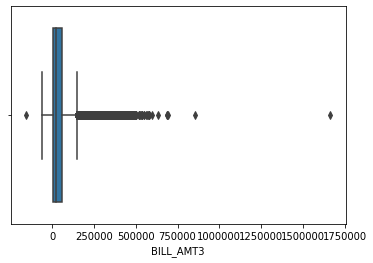

BILL_AMT4


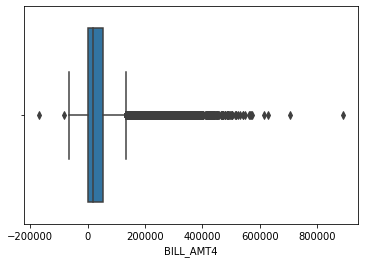

BILL_AMT5


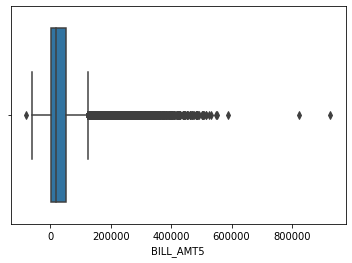

BILL_AMT6


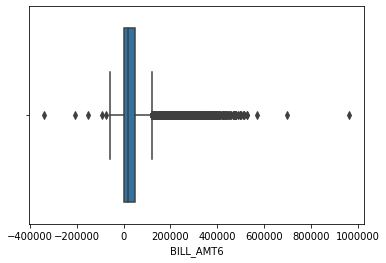

PAY_AMT1


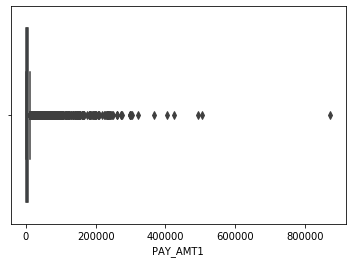

PAY_AMT2


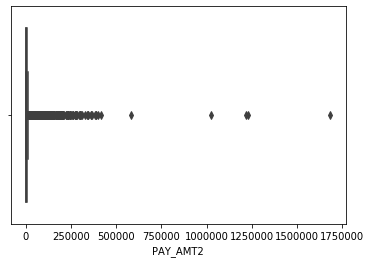

PAY_AMT3


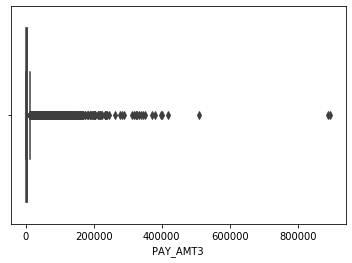

PAY_AMT4


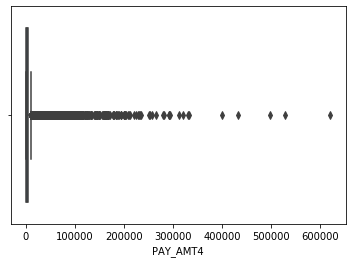

PAY_AMT5


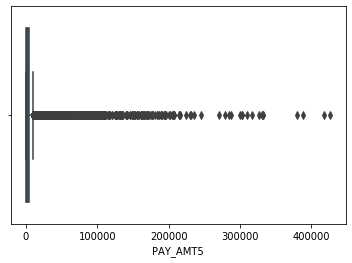

PAY_AMT6


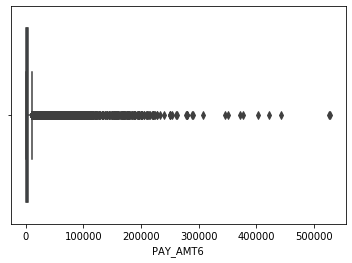

DEFAULT


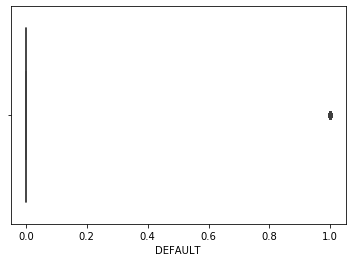

In [15]:
for i in creditdata:
    print(i)
    sns.boxplot(creditdata[i])
    plt.show()

In [16]:
creditdata.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')

### Bivariate Analysis

    Num vs Num - Scatterplot

    Cat Vs Num - Boxplot (Statistical Plot) | Violin Plot

    Cat Vs Cat - pd.crosstab | Table - Frequency



In [17]:
creditdata.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55]), <a list of 56 Text xticklabel objects>)

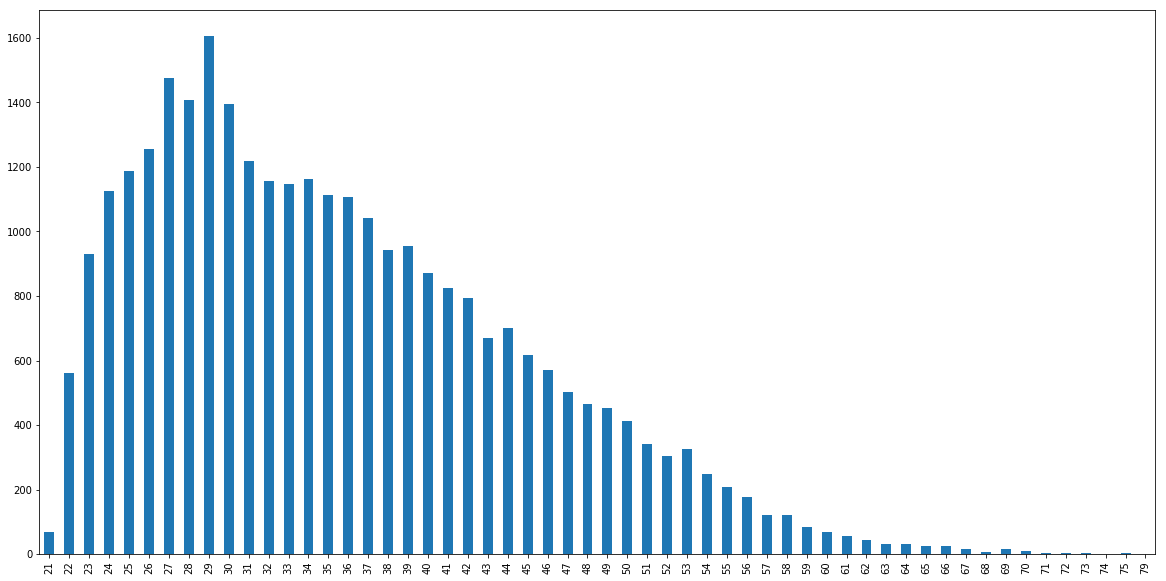

In [18]:
plt.figure(figsize=(20,10))

creditdata.AGE.value_counts().sort_index().plot(kind = "bar")
plt.xticks(rotation=90)

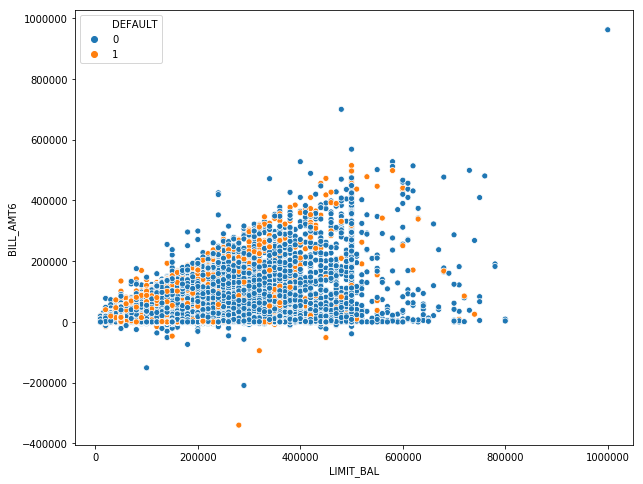

In [19]:
plt.figure(figsize=(10,8))
sns.scatterplot(creditdata.LIMIT_BAL,creditdata.BILL_AMT6,hue = creditdata.DEFAULT)


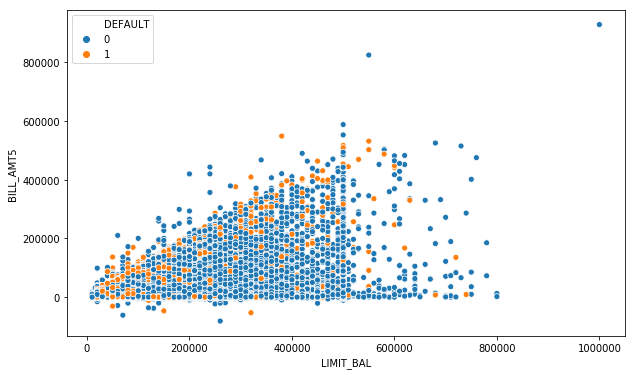

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(creditdata.LIMIT_BAL,creditdata.BILL_AMT5,hue = creditdata.DEFAULT)


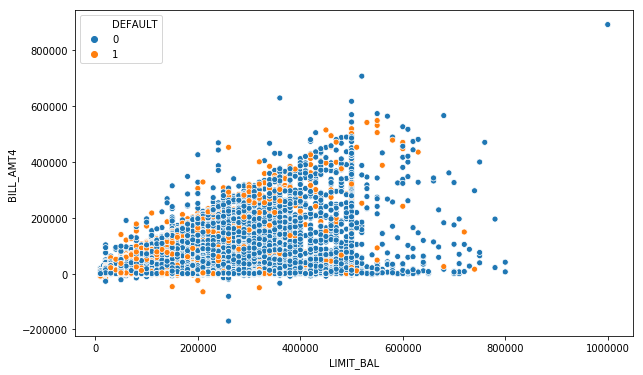

In [21]:
plt.figure(figsize=(10,6))
sns.scatterplot(creditdata.LIMIT_BAL,creditdata.BILL_AMT4,hue = creditdata.DEFAULT)


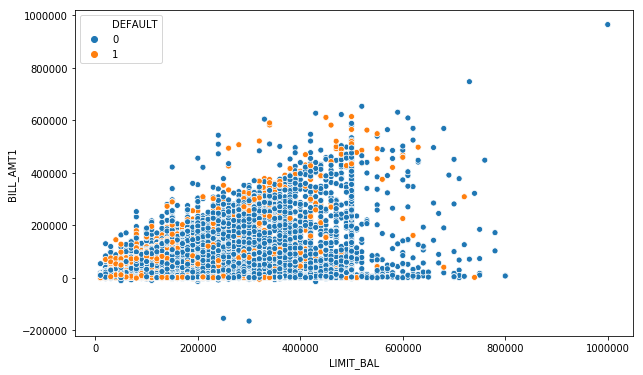

In [22]:
plt.figure(figsize=(10,6))
sns.scatterplot(creditdata.LIMIT_BAL,creditdata.BILL_AMT1,hue = creditdata.DEFAULT)


In [23]:
Q1 = creditdata['LIMIT_BAL'].quantile(0.01)
Q3 = creditdata['LIMIT_BAL'].quantile(0.99)
IQR = Q3-Q1 
IQR
Out_LIMIT_bal_upp = (Q3+1.5 *(IQR)) 
Out_LIMIT_bal_low = (Q1 - 1.5 *(IQR)) 
print('Upper_limit LIMIT_BAL :', Out_LIMIT_bal_upp)
print('Lower_limit LIMIT_BAL :', Out_LIMIT_bal_low)


Upper_limit LIMIT_BAL : 1235000.0
Lower_limit LIMIT_BAL : -725000.0


In [24]:
Limit_bal_out = creditdata[creditdata['LIMIT_BAL']>1235000]
print(Limit_bal_out.shape)
Limit_bal_out1 = creditdata[creditdata['LIMIT_BAL']<-725000]
print(Limit_bal_out1.shape)

(0, 24)
(0, 24)


In [25]:
Q3 = creditdata['LIMIT_BAL'].quantile(0.99)
Q3

500000.0

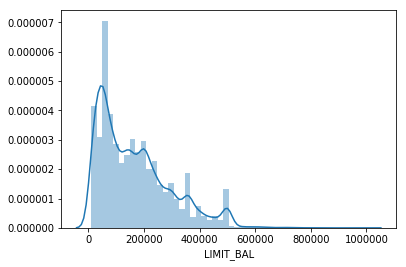

In [26]:
sns.distplot(creditdata.LIMIT_BAL)
plt.show()

In [67]:
from scipy import stats
from sklearn.preprocessing import power_transform

In [28]:
transform = np.asarray(creditdata['LIMIT_BAL'].values)

In [29]:
transform

array([ 20000, 120000,  90000, ...,  30000,  80000,  50000], dtype=int64)

In [30]:
creditdata.LIMIT_BAL.values

array([ 20000, 120000,  90000, ...,  30000,  80000,  50000], dtype=int64)

In [31]:
df = stats.(transform)
pd.Series(df)

SyntaxError: invalid syntax (<ipython-input-31-a6835a4ece0b>, line 1)

In [ ]:
#Boxcox

In [ ]:
limit_boxcox = stats.boxcox(creditdata['LIMIT_BAL'])

In [ ]:
limit_boxcox[0]

In [ ]:
len(creditdata['LIMIT_BAL'])

In [ ]:
sns.distplot(limit_boxcox[0])
plt.show()

In [ ]:
np.mean(limit_boxcox[0])

In [ ]:
np.median(limit_boxcox[0])

In [ ]:
sns.boxplot(limit_boxcox[0])
plt.show()

In [69]:
age_boxcox = stats.boxcox(creditdata['AGE'])

In [ ]:
age_boxcox

In [ ]:
sns.distplot(age_boxcox[0])

In [ ]:
sns.distplot(creditdata.AGE)

In [ ]:
##quantile tranform

In [34]:
from sklearn.preprocessing import quantile_transform
import warnings
warnings.filterwarnings('ignore')

###  Bill amount

In [51]:
bill_amt1 = quantile_transform(creditdata[['BILL_AMT1']], random_state=0, copy='warn').flatten()
bill_amt2 = quantile_transform(creditdata[['BILL_AMT2']], random_state=0, copy='warn').flatten()
bill_amt3 = quantile_transform(creditdata[['BILL_AMT3']], random_state =0, copy = 'warn').flatten()
bill_amt4 = quantile_transform(creditdata[['BILL_AMT4']], random_state=0, copy='warn').flatten()
bill_amt5 = quantile_transform(creditdata[['BILL_AMT5']], random_state =0, copy = 'warn').flatten()
bill_amt6 = quantile_transform(creditdata[['BILL_AMT6']], random_state= 0, copy= 'warn').flatten()

### Pay_Amt 

In [52]:
pay_amt1 =(quantile_transform(creditdata[['PAY_AMT1']], random_state=0, copy='warn')).flatten()
pay_amt2 = (quantile_transform(creditdata[['PAY_AMT2']], random_state=0, copy='warn')).flatten()
pay_amt3 = (quantile_transform(creditdata[['PAY_AMT3']], random_state=0, copy='warn')).flatten()
pay_amt4 = (quantile_transform(creditdata[['PAY_AMT4']], random_state=0, copy='warn')).flatten()
pay_amt5 = (quantile_transform(creditdata[['PAY_AMT5']], random_state=0, copy='warn')).flatten()
pay_amt6 = (quantile_transform(creditdata[['PAY_AMT6']], random_state=0, copy='warn')).flatten()


### Limit bal

In [53]:
limit_bal = (quantile_transform(creditdata[['LIMIT_BAL']],random_state = 0,copy='warn')).flatten()

### Age

In [100]:
Age = (quantile_transform(creditdata[['AGE']]))
Age= Age.flatten()
Age

(30000,)

In [107]:
Age

array([0.07057057, 0.14964965, 0.5035035 , ..., 0.61461461, 0.73773774,
       0.85385385])

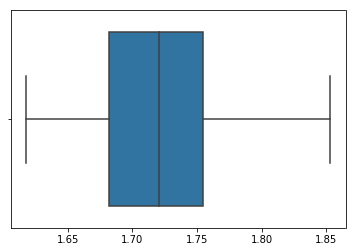

In [86]:
sns.boxplot(age)

In [97]:
# df = pd.DataFrame({'Pay_amt1':pay_amt1,'Pay_amt2':pay_amt2,'Pay_amt3':pay_amt3,'Pay_amt4':pay_amt4,'Pay_amt5':pay_amt5,'Pay_amt6':pay_amt6,
#                    'Bill_amt1':bill_amt1,'Bill_amt2':bill_amt2,'Bill_amt3':bill_amt3,'Bill_amt4':bill_amt4,'Bill_amt5':bill_amt5,'Bill_amt6':bill_amt6})

In [195]:
df1 = pd.DataFrame([limit_bal,Age,creditdata.SEX, creditdata.EDUCATION, creditdata.MARRIAGE,creditdata.PAY_1,creditdata.PAY_2,creditdata.PAY_3,creditdata.PAY_4,creditdata.PAY_5,creditdata.PAY_6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6],index=cols).T

In [125]:
# df1.rename(columns = {0: "Limi_Bal", 1 :"Age", 2 : "Sex" ,3 : "Education", 4 : "Marriage", 5 : "Pay_1", 6 : "Pay_2",
#                      7 : "Pay_3",8 : "Pay_4",9 : "Pay_5",10 : "Pay_6",11:"pay_amt1",12:"pay_amt2",13:"pay_amt3",14:"pay_amt4",
#                     15:"pay_amt5:",16:"pay_amt6",17:"bill_amt1",18:"bill_amt2",19:"bill_amt3",20:"bill_amt4",21:"bill_amt5",22:"bill_amt6"}) 

In [181]:
df1

,LIMIT_BAL,AGE,SEX,EDUCATION,MARRIAGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
0,0.049550,0.070571,2.0,2.0,1.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.000000,0.000000,0.000000,0.000000,0.258230,0.252574,0.171998,0.075576,0.080080,0.089590
1,0.447948,0.149650,2.0,2.0,2.0,-1.0,2.0,0.0,0.0,0.0,...,0.341341,0.402903,0.000000,0.570571,0.226961,0.210907,0.250209,0.275558,0.296541,0.312311
2,0.370871,0.503504,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.341341,0.402903,0.401401,0.795796,0.556006,0.411803,0.413988,0.435188,0.460215,0.482523
3,0.199700,0.614615,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.394895,0.445445,0.435936,0.412412,0.653001,0.673930,0.700932,0.595854,0.626795,0.645855
4,0.199700,0.979479,1.0,2.0,1.0,-1.0,0.0,-1.0,0.0,0.0,...,0.898899,0.893393,0.331807,0.343343,0.341997,0.303128,0.623415,0.533094,0.520585,0.533075
5,0.199700,0.614615,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.285082,0.402903,0.401401,0.366366,0.742024,0.724717,0.740016,0.507134,0.532787,0.555153
6,0.981481,0.293794,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.979643,0.961494,0.939456,0.937393,0.991666,0.995734,0.997417,0.999152,0.999059,0.999050
7,0.399399,0.036036,2.0,2.0,2.0,0.0,-1.0,-1.0,0.0,0.0,...,0.000000,0.310422,0.517343,0.511261,0.385423,0.133321,0.166936,0.137518,0.011832,0.207207
8,0.497497,0.243243,2.0,3.0,1.0,0.0,0.0,2.0,0.0,0.0,...,0.257145,0.402903,0.401401,0.412412,0.378757,0.412627,0.398879,0.411350,0.426074,0.321641
9,0.049550,0.541542,1.0,3.0,2.0,-2.0,-2.0,-2.0,-2.0,-1.0,...,0.000000,0.936047,0.445907,0.000000,0.053053,0.064064,0.069570,0.075576,0.439184,0.465517


In [196]:
cols= ['LIMIT_BAL','AGE','SEX','EDUCATION','MARRIAGE','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6','BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

SEX


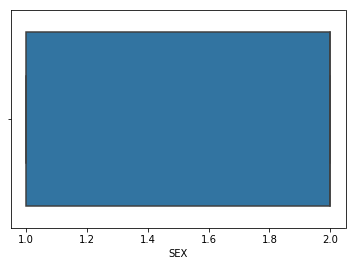

EDUCATION


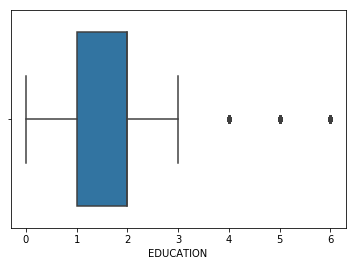

MARRIAGE


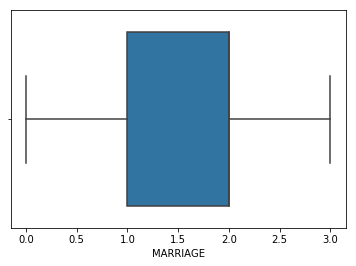

AGE


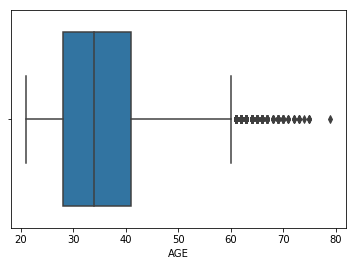

Unnamed 0


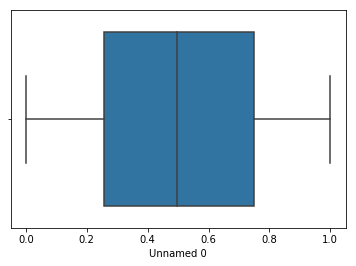

Unnamed 1


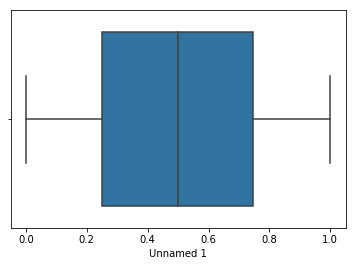

Unnamed 2


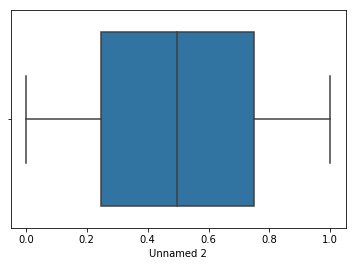

Unnamed 3


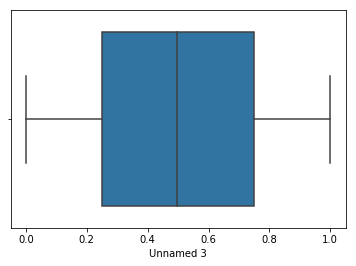

Unnamed 4


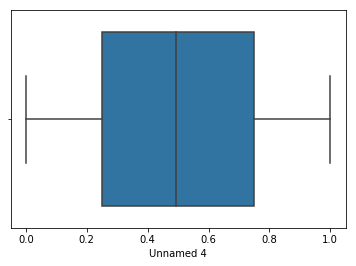

Unnamed 5


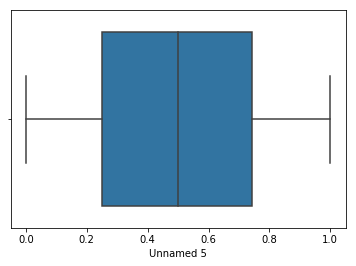

Unnamed 6


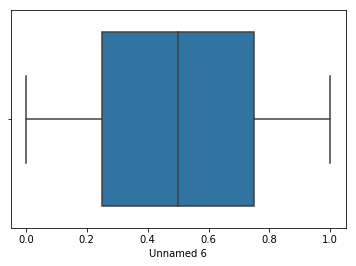

Unnamed 7


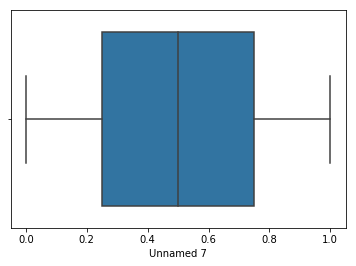

Unnamed 8


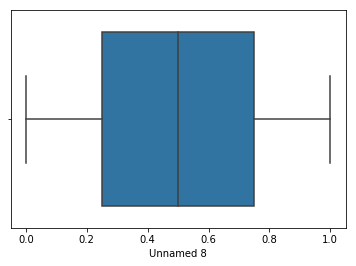

Unnamed 9


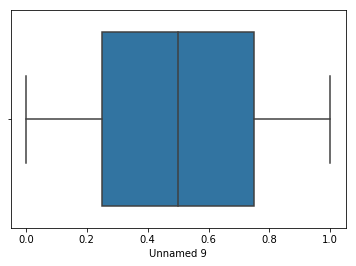

Unnamed 10


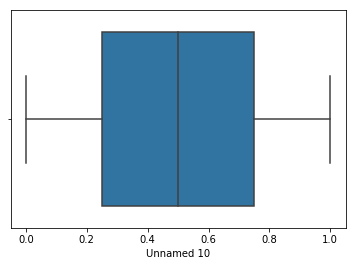

Unnamed 11


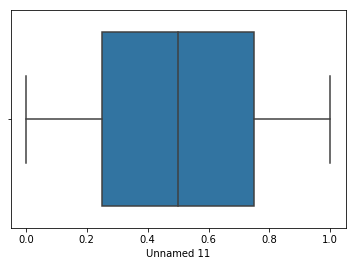

In [65]:
for i in df1.columns:
    print(i)
    sns.boxplot(df1[i])
    plt.show()

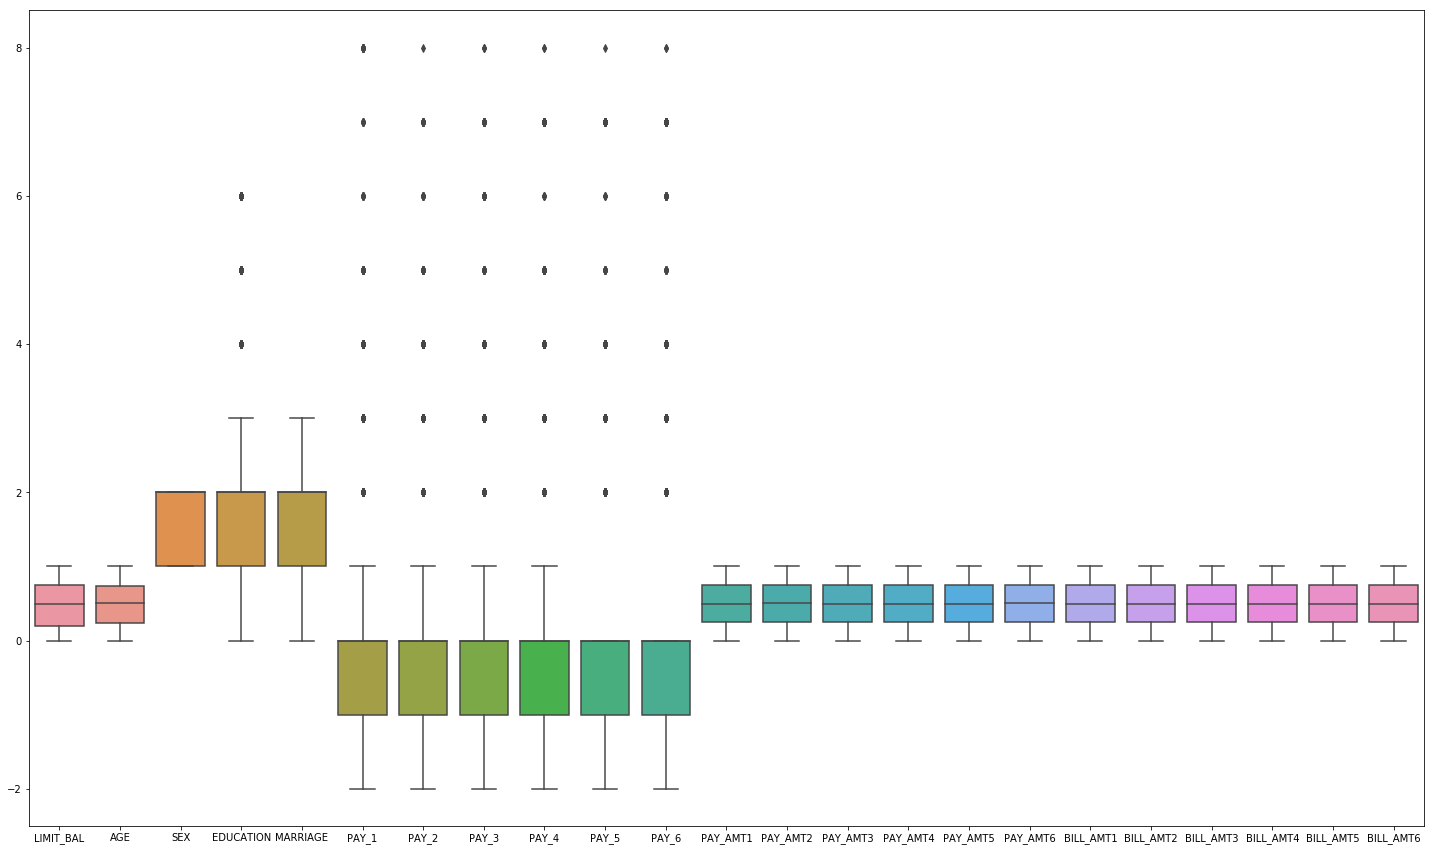

In [150]:
sns.boxplot(data= df1)
fig=plt.gcf()
fig.set_size_inches(25,15)

In [197]:
df1.columns

Index(['LIMIT_BAL', 'AGE', 'SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'],
      dtype='object')

In [198]:
df1.head()

,LIMIT_BAL,AGE,SEX,EDUCATION,MARRIAGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
0,0.049550,0.070571,2.0,2.0,1.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.000000,0.000000,0.000000,0.000000,0.258230,0.252574,0.171998,0.075576,0.080080,0.089590
1,0.447948,0.149650,2.0,2.0,2.0,-1.0,2.0,0.0,0.0,0.0,...,0.341341,0.402903,0.000000,0.570571,0.226961,0.210907,0.250209,0.275558,0.296541,0.312311
2,0.370871,0.503504,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.341341,0.402903,0.401401,0.795796,0.556006,0.411803,0.413988,0.435188,0.460215,0.482523
3,0.199700,0.614615,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.394895,0.445445,0.435936,0.412412,0.653001,0.673930,0.700932,0.595854,0.626795,0.645855
4,0.199700,0.979479,1.0,2.0,1.0,-1.0,0.0,-1.0,0.0,0.0,...,0.898899,0.893393,0.331807,0.343343,0.341997,0.303128,0.623415,0.533094,0.520585,0.533075


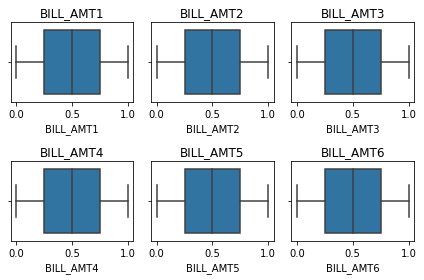

In [147]:
def draw_histograms(df1, variables, n_rows, n_cols):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        sns.boxplot(df1[var_name],ax=ax)
        ax.set_title(var_name)
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()
bills = df1[['BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]
draw_histograms(bills, bills.columns, 2, 3)

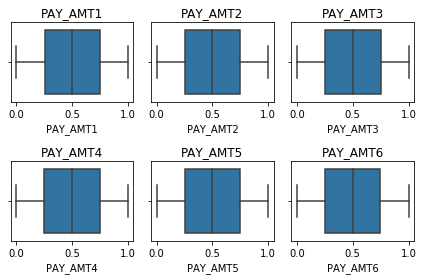

In [151]:
def draw_histograms(df1, variables, n_rows, n_cols):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        sns.boxplot(df1[var_name],ax=ax)
        ax.set_title(var_name)
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()
pays = df1[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3','PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
draw_histograms(pays, pays.columns, 2, 3)

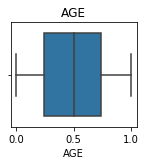

In [153]:
def draw_histograms(df1, variables, n_rows, n_cols):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        sns.boxplot(df1[var_name],ax=ax)
        ax.set_title(var_name)
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()
age = df1[['AGE']]
draw_histograms(age, age.columns, 2, 3)

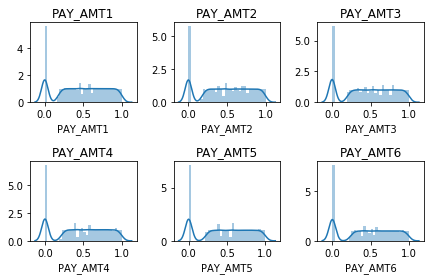

In [154]:
def draw_histograms(df1, variables, n_rows, n_cols):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        sns.distplot(df1[var_name],ax=ax)
        ax.set_title(var_name)
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()
pays = df1[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3','PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
draw_histograms(pays, pays.columns, 2, 3)

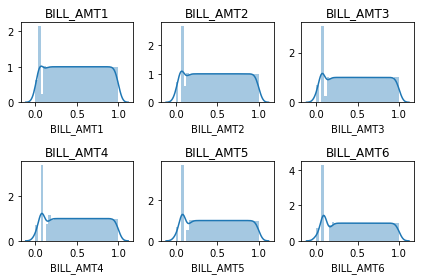

In [155]:
def draw_histograms(df1, variables, n_rows, n_cols):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        sns.distplot(df1[var_name],ax=ax)
        ax.set_title(var_name)
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()
bills = df1[['BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]
draw_histograms(bills, bills.columns, 2, 3)

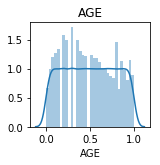

In [156]:
def draw_histograms(df1, variables, n_rows, n_cols):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        sns.distplot(df1[var_name],ax=ax)
        ax.set_title(var_name)
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()
age = df1[['AGE']]
draw_histograms(age, age.columns, 2, 3)

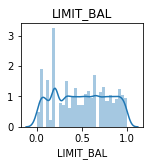

In [157]:
def draw_histograms(df1, variables, n_rows, n_cols):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        sns.distplot(df1[var_name],ax=ax)
        ax.set_title(var_name)
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()
lb = df1[['LIMIT_BAL']]
draw_histograms(lb, lb.columns, 2, 3)

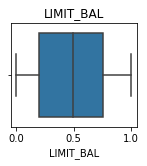

In [160]:

def draw_histograms(df1, variables, n_rows, n_cols):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        sns.boxplot(df1[var_name],ax=ax)
        ax.set_title(var_name)
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()
lb = df1[['LIMIT_BAL']]
draw_histograms(lb, lb.columns, 2, 3)

In [200]:
df1.EDUCATION.unique()

array([2., 1., 3., 5., 4., 6., 0.])

In [199]:
df1.EDUCATION.value_counts()

2.0    14030
1.0    10585
3.0     4917
5.0      280
4.0      123
6.0       51
0.0       14
Name: EDUCATION, dtype: int64

In [203]:
df2 = (df1.EDUCATION == 5) | (df1.EDUCATION == 6) | (df1.EDUCATION == 0) 
df1.loc[df2,'EDUCATION']=4

In [206]:
df1.EDUCATION.value_counts()

2.0    14030
1.0    10585
3.0     4917
4.0      468
Name: EDUCATION, dtype: int64

In [212]:
df2 = (df1.PAY_1 == -1) | (df1.PAY_1 == - 2)
df1.loc[df2,'PAY_1']=0

df2 = (df1.PAY_2 == -1) | (df1.PAY_2 == - 2)
df1.loc[df2,'PAY_2']=0

df2 = (df1.PAY_3 == -1) | (df1.PAY_3 == - 2)
df1.loc[df2,'PAY_3']=0

df2 = (df1.PAY_4 == -1) | (df1.PAY_4 == - 2)
df1.loc[df2,'PAY_4']=0

df2 = (df1.PAY_5 == -1) | (df1.PAY_5 == - 2)
df1.loc[df2,'PAY_5']=0

df2 = (df1.PAY_6 == -1) | (df1.PAY_6 == - 2)
df1.loc[df2,'PAY_6']=0

In [213]:
df1.PAY_1.value_counts()

0.0    23182
1.0     3688
2.0     2667
3.0      322
4.0       76
5.0       26
8.0       19
6.0       11
7.0        9
Name: PAY_1, dtype: int64

In [214]:
df1.head()

,LIMIT_BAL,AGE,SEX,EDUCATION,MARRIAGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
0,0.049550,0.070571,2.0,2.0,1.0,2.0,2.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.258230,0.252574,0.171998,0.075576,0.080080,0.089590
1,0.447948,0.149650,2.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,...,0.341341,0.402903,0.000000,0.570571,0.226961,0.210907,0.250209,0.275558,0.296541,0.312311
2,0.370871,0.503504,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.341341,0.402903,0.401401,0.795796,0.556006,0.411803,0.413988,0.435188,0.460215,0.482523
3,0.199700,0.614615,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.394895,0.445445,0.435936,0.412412,0.653001,0.673930,0.700932,0.595854,0.626795,0.645855
4,0.199700,0.979479,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.898899,0.893393,0.331807,0.343343,0.341997,0.303128,0.623415,0.533094,0.520585,0.533075


In [216]:
from sklearn.model_selection import train_test_split
X = df1
y = creditdata.DEFAULT


In [229]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score,classification_report, cohen_kappa_score


In [218]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state = 0)

In [233]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

y_predict = log_reg.predict(X_test)
log_score_test = log_reg.score(X_test,y_test)

log_score_train = log_reg.score(X_train,y_train)

print("Testing",log_score_test)
print("Training",log_score_train)

Testing 0.8191111111111111
Training 0.8133333333333334


In [280]:
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))


[[6806  254]
 [1374  566]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      7060
           1       0.69      0.29      0.41      1940

    accuracy                           0.82      9000
   macro avg       0.76      0.63      0.65      9000
weighted avg       0.80      0.82      0.79      9000



In [243]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Dtree = DecisionTreeClassifier(max_depth=2)
Dtree.fit (X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [244]:
predictValues_train = Dtree.predict(X_train)
#print(predictValues_train)
accuracy_train=accuracy_score(y_train, predictValues_train)

predictValues_test = Dtree.predict(X_test)
#print(predictValues_validate)
accuracy_test=accuracy_score(y_test, predictValues_test)

print("Train Accuracy  :: ",accuracy_train)
print("Test Accuracy  :: ",accuracy_test)

Train Accuracy  ::  0.8168571428571428
Test Accuracy  ::  0.826


In [ ]:
ggplot(creditdata, aes(x = EDUCATION, fill = LIMIT_BAL)) +
  geom_bar() + labs(x = 'EDUCATION') + labs(y = 'LIMIT_BAL ') + theme_economist()

In [275]:
def draw_histograms(df1, variables, n_rows, n_cols):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        sns.scatterplot(df1[var_name],df1[var_name],ax=ax)
        ax.set_title(var_name)
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()
age = [df1['LIMIT_BAL'],df1['BILL_AMT1']
draw_scatterplot(age, age.columns, 2, 3)

SyntaxError: invalid syntax (<ipython-input-275-44cf55d7eb7c>, line 10)

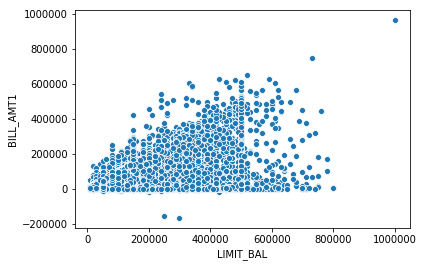

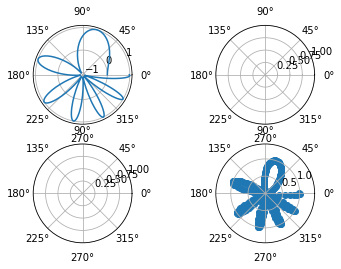

In [262]:
sns.scatterplot(creditdata.LIMIT_BAL,creditdata.BILL_AMT1)
# First create some toy data:
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)

fig, axes = plt.subplots(2, 2, subplot_kw=dict(polar=True))
axes[0, 0].plot(x, y)
axes[1, 1].scatter(x, y)

In [263]:
creditdata.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')

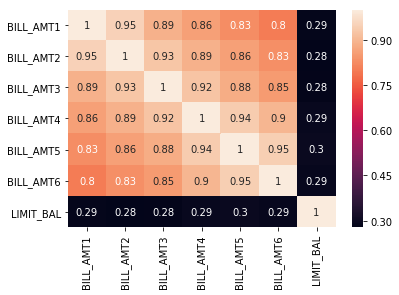

In [270]:
bill_heat = ['BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6','LIMIT_BAL']
sns.heatmap(creditdata[bill_heat].corr(),annot= True)

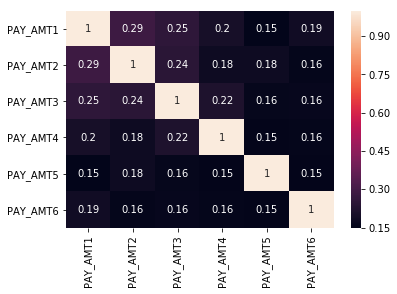

In [271]:
payamt_heat = ['PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
sns.heatmap(creditdata[payamt_heat].corr(),annot= True)

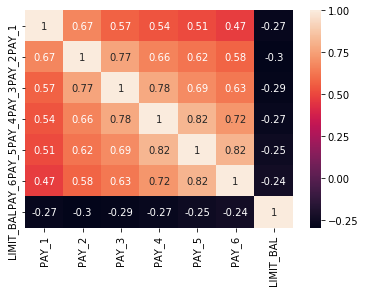

In [274]:
pay_heat = ['PAY_1', 'PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','LIMIT_BAL']

sns.heatmap(creditdata[pay_heat].corr(),annot=True)